## DATA ANALYSIS PYTHON PROJECT - BLINKIT ANALYSIS 

## import libraries

In [47]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns   

## import raw data

In [59]:
df = pd.read_csv('BlinkIT Grocery Data.csv')


## sample data

In [49]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


## size of data

In [50]:
df.shape

(8523, 12)

## Field info 

In [51]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

## Data types

In [52]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

## Data cleaning

In [60]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [62]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'}) 

In [63]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


## BUSINESS REQUIREMENTS 
## KPI's REQUIREMENTS

In [ ]:
# total sales
total_sales = df['Sales'].sum()

#average sales
avg_sales = df['Sales'].mean()

#no of items sold
no_of_items_sold = df['Sales'].count()

#average rating
avg_rating = df['Rating'].mean()

#display 

print(f"Total Sales: ${total_sales:,.0f}")
print(f"Average Sales: ${avg_sales:,.1f}")
print(f"Average Rating: {avg_rating:,.1f}")
print(f"No of Items Sold: {no_of_items_sold:,.0f}")





Total Sales: $1,201,681
Average Sales: $141.0
Average Rating: 4.0
No of Items Sold: 8,523


## CHARTS REQUIREMENTS

#### Total Sales by Fat Content

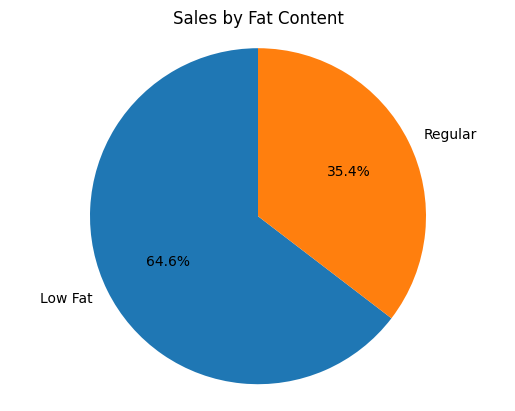

In [ ]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat, labels=sales_by_fat_content.index, 
                    autopct='%1.1f%%', 
                    startangle=90)

plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

#### Total Sales by Item Type

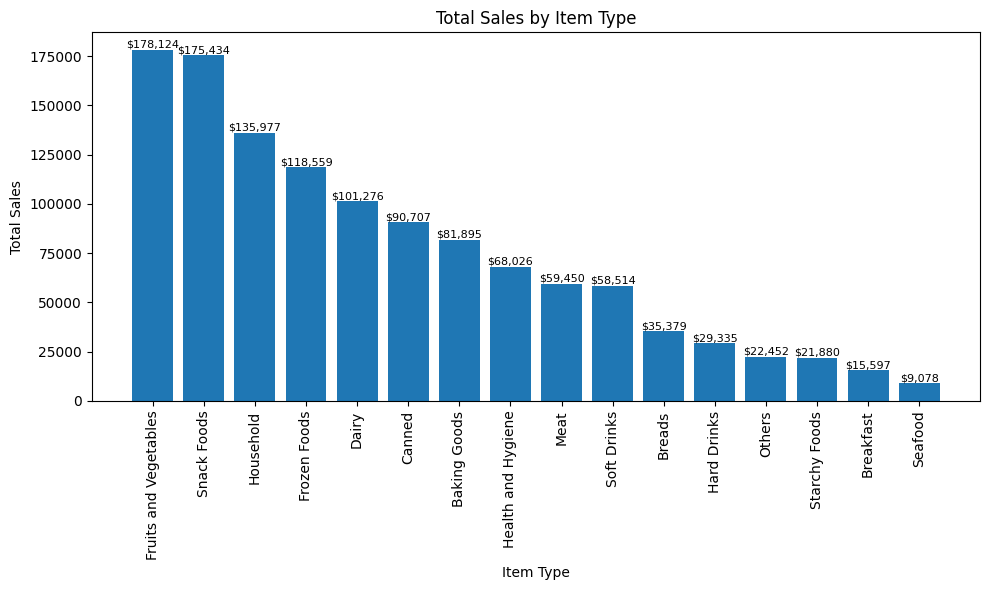

In [94]:
sales_by_items = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars = plt.bar(sales_by_items.index, sales_by_items.values)
plt.xticks(rotation=90)     
plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')     
plt.ylabel('Total Sales')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
                f'${bar.get_height():,.0f}', 
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()

plt.show()  

#### Fat content by outlet for total sales

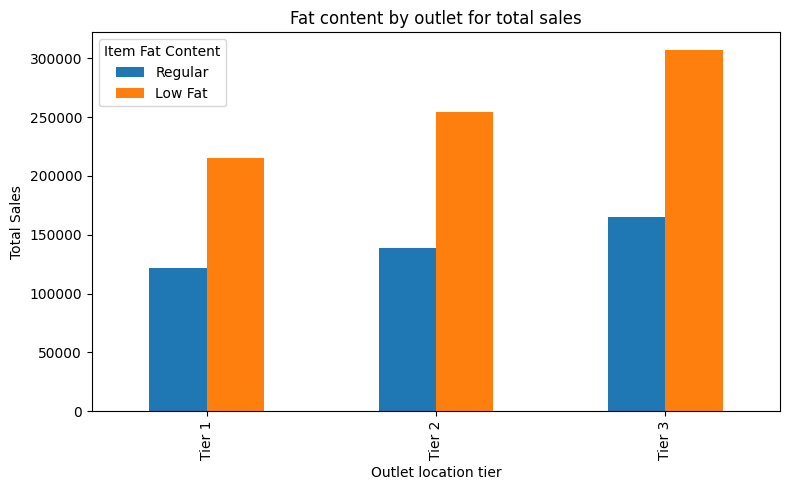

In [98]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8,5), title='Fat content by outlet for total sales')
plt.xlabel('Outlet location tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

#### Total sales by outlet establishment


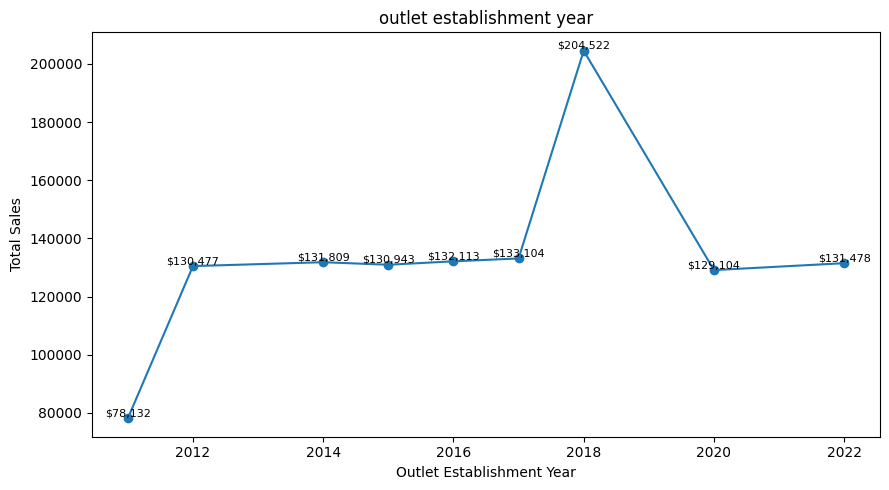

In [103]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.title('outlet establishment year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
for x,y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'${y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### sales by outlet size


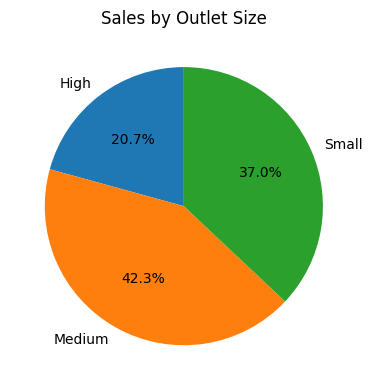

In [104]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, 
                    autopct='%1.1f%%', 
                    startangle=90)
plt.title('Sales by Outlet Size')
plt.tight_layout()
plt.show()

#### Sales by outlet location

C:\Users\jacks\AppData\Local\Temp\ipykernel_8972\2095652695.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y='Outlet Location Type', x='Sales', data=sales_by_location, palette='viridis')


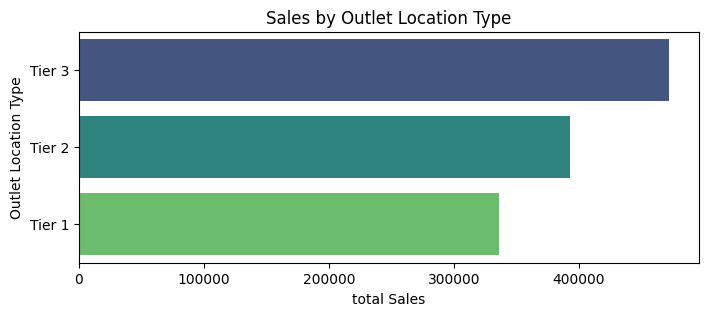

In [110]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(8,3)) # smaller hight,enou width
ax = sns.barplot(y='Outlet Location Type', x='Sales', data=sales_by_location, palette='viridis')
plt.title('Sales by Outlet Location Type')
plt.xlabel('total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout #ensure layout fits well
plt.show()